In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from helper_functions import *

df = pd.read_csv('resultsCIFAR10untarget.csv')
sns.set_theme(style="whitegrid")
palette = sns.color_palette("hls", 6)

# Untargeted attack

## Metrics


* Success Rate by Pixel & Model
* Success Rate by Class Label & Pixel Count
* Confusion matrix
* Average Confidence / Adversarial Probability Labels
* Confidence Difference Boxplots
* Identifyling Outliers


In [20]:
model_names = ["All Convolution", "Network in Network", "VGG16"]
pixel_counts = [1,2,3,4,5,6]

# Initialize dictionaries for results
model_tables = {}
conf_matrix_set = {}

# Loop through each model and pixel count, calculate success rates and confusion matrices
for model in model_names:
    model_results = {}

    for pixel in pixel_counts:
        filtered_df = df[(df['model_name'] == model) & (df['pixel_count'] == pixel)]

        # Get success rate by class
        success_rate_class = success_by_class(filtered_df)

        # Get confusion matrix
        conf_matrix_data = conf_matrix(filtered_df, model, pixel)

        # Store results
        model_results[f"{pixel} Pixel"] = success_rate_class
        conf_matrix_set[f"{model} {pixel} Pixel"] = conf_matrix_data

    # Convert results into a DataFrame and store
    model_tables[model] = pd.DataFrame(model_results)

## Success Rate by Pixel & Model

In [21]:
get_success_rate_table_by_pixel_count(df)

/content/helper_functions.py:129: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  success_by_pixel_count = success_by_pixel_count.applymap(lambda x: f"{x:.2f}%")


pixel_count,1,2,3,4,5,6
model_name,,,,,,
All Convolution,21.50%,48.00%,61.50%,63.00%,65.00%,67.00%
Network in Network,30.50%,63.00%,74.00%,74.00%,77.50%,76.50%
VGG16,16.50%,45.00%,58.50%,62.00%,63.00%,63.50%


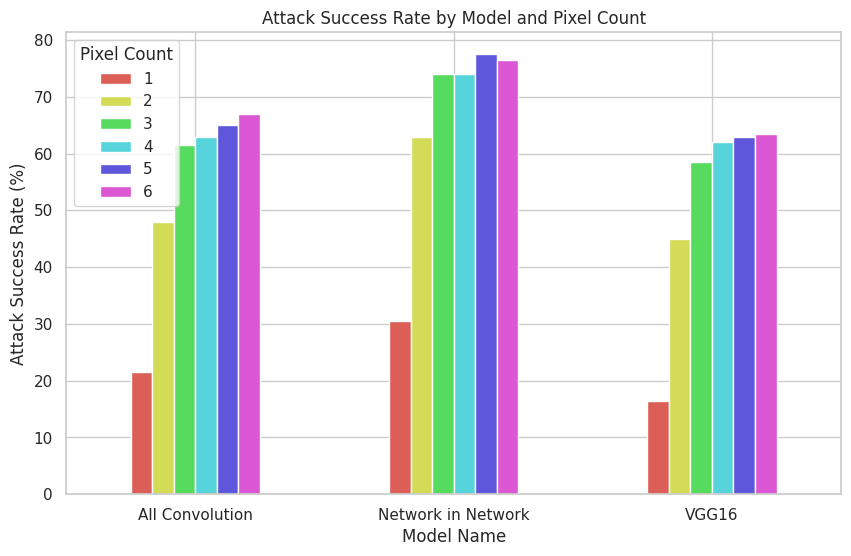

In [22]:
plot_success_rate_by_pixel_count(df)


## Success Rate by Class Label & Pixel Count

In [6]:
model_tables["All Convolution"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,10.00%,25.00%,40.00%,40.00%,45.00%,50.00%
1,0.00%,25.00%,30.00%,35.00%,50.00%,50.00%
2,10.00%,45.00%,65.00%,65.00%,75.00%,80.00%
3,30.00%,60.00%,80.00%,80.00%,75.00%,75.00%
4,50.00%,75.00%,80.00%,80.00%,85.00%,85.00%
5,45.00%,75.00%,80.00%,80.00%,80.00%,80.00%
6,35.00%,75.00%,85.00%,85.00%,80.00%,80.00%
7,15.00%,45.00%,65.00%,65.00%,60.00%,60.00%
8,5.00%,30.00%,50.00%,60.00%,60.00%,75.00%


In [7]:
model_tables["Network in Network"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,10.00%,40.00%,60.00%,60.00%,60.00%,70.00%
1,25.00%,55.00%,70.00%,80.00%,85.00%,70.00%
2,20.00%,65.00%,85.00%,85.00%,85.00%,85.00%
3,65.00%,85.00%,80.00%,85.00%,85.00%,85.00%
4,60.00%,85.00%,95.00%,85.00%,95.00%,100.00%
5,30.00%,65.00%,80.00%,75.00%,80.00%,80.00%
6,30.00%,60.00%,75.00%,60.00%,75.00%,75.00%
7,20.00%,70.00%,70.00%,75.00%,70.00%,70.00%
8,35.00%,65.00%,80.00%,90.00%,95.00%,85.00%


In [8]:
model_tables["VGG16"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,5.00%,20.00%,25.00%,25.00%,25.00%,30.00%
1,10.00%,15.00%,30.00%,40.00%,35.00%,45.00%
2,5.00%,35.00%,45.00%,55.00%,70.00%,60.00%
3,40.00%,70.00%,75.00%,85.00%,80.00%,85.00%
4,25.00%,85.00%,90.00%,85.00%,85.00%,85.00%
5,20.00%,55.00%,75.00%,75.00%,75.00%,65.00%
6,30.00%,55.00%,75.00%,75.00%,80.00%,80.00%
7,10.00%,35.00%,50.00%,55.00%,55.00%,55.00%
8,15.00%,55.00%,85.00%,90.00%,85.00%,95.00%


/content/helper_functions.py:77: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  model_data = df.applymap(lambda x: float(x.strip('%')))


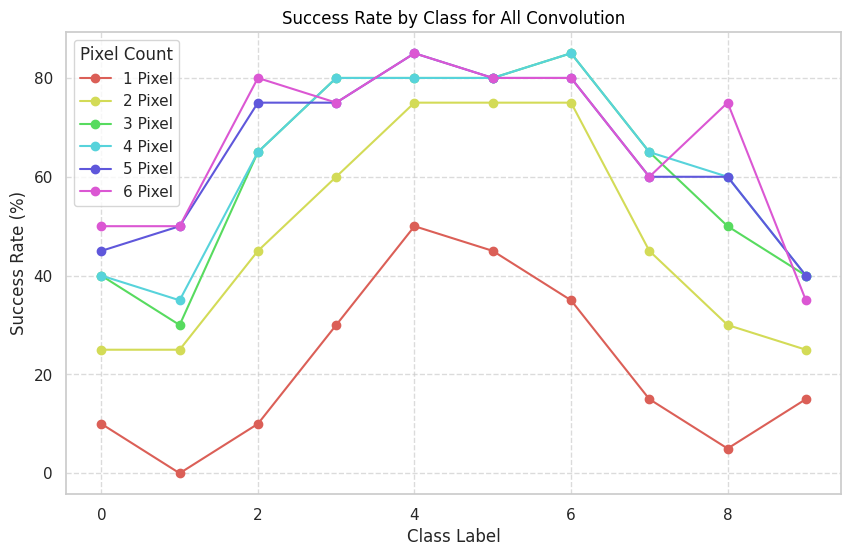

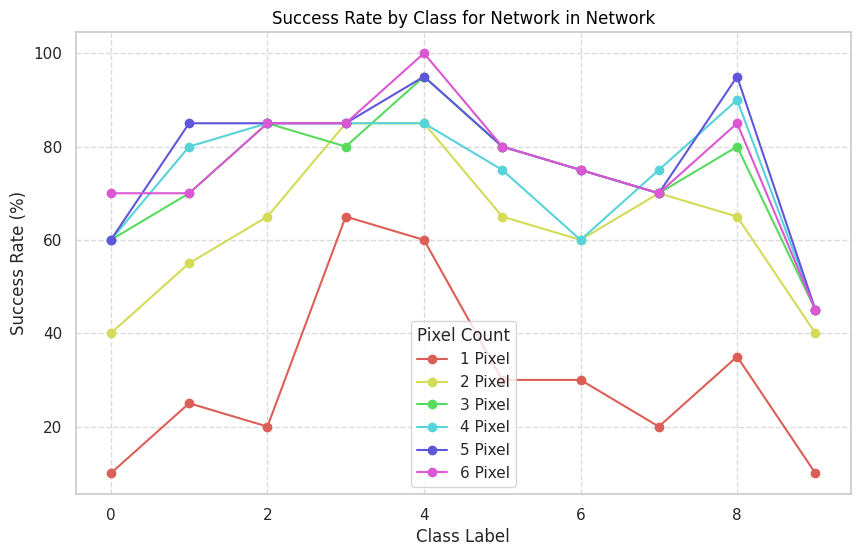

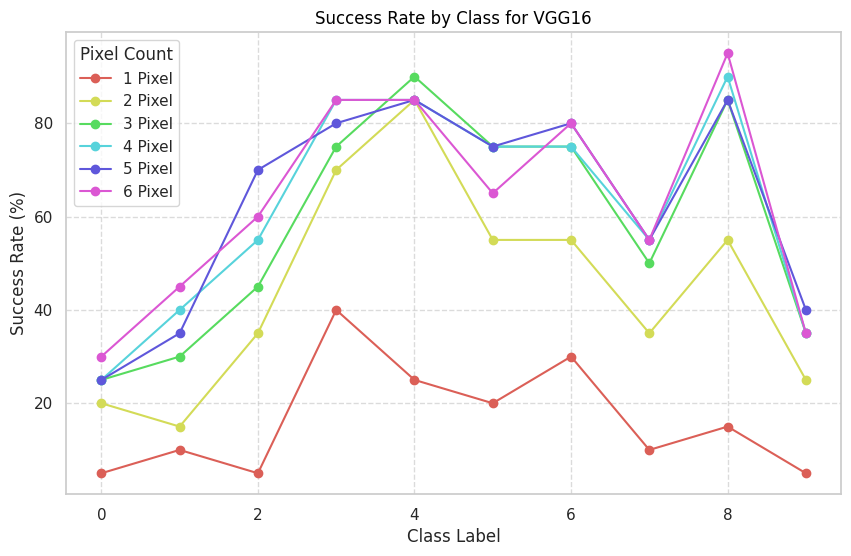

In [23]:
plot_success_rate_by_class(model_tables)

## Confusion matrices

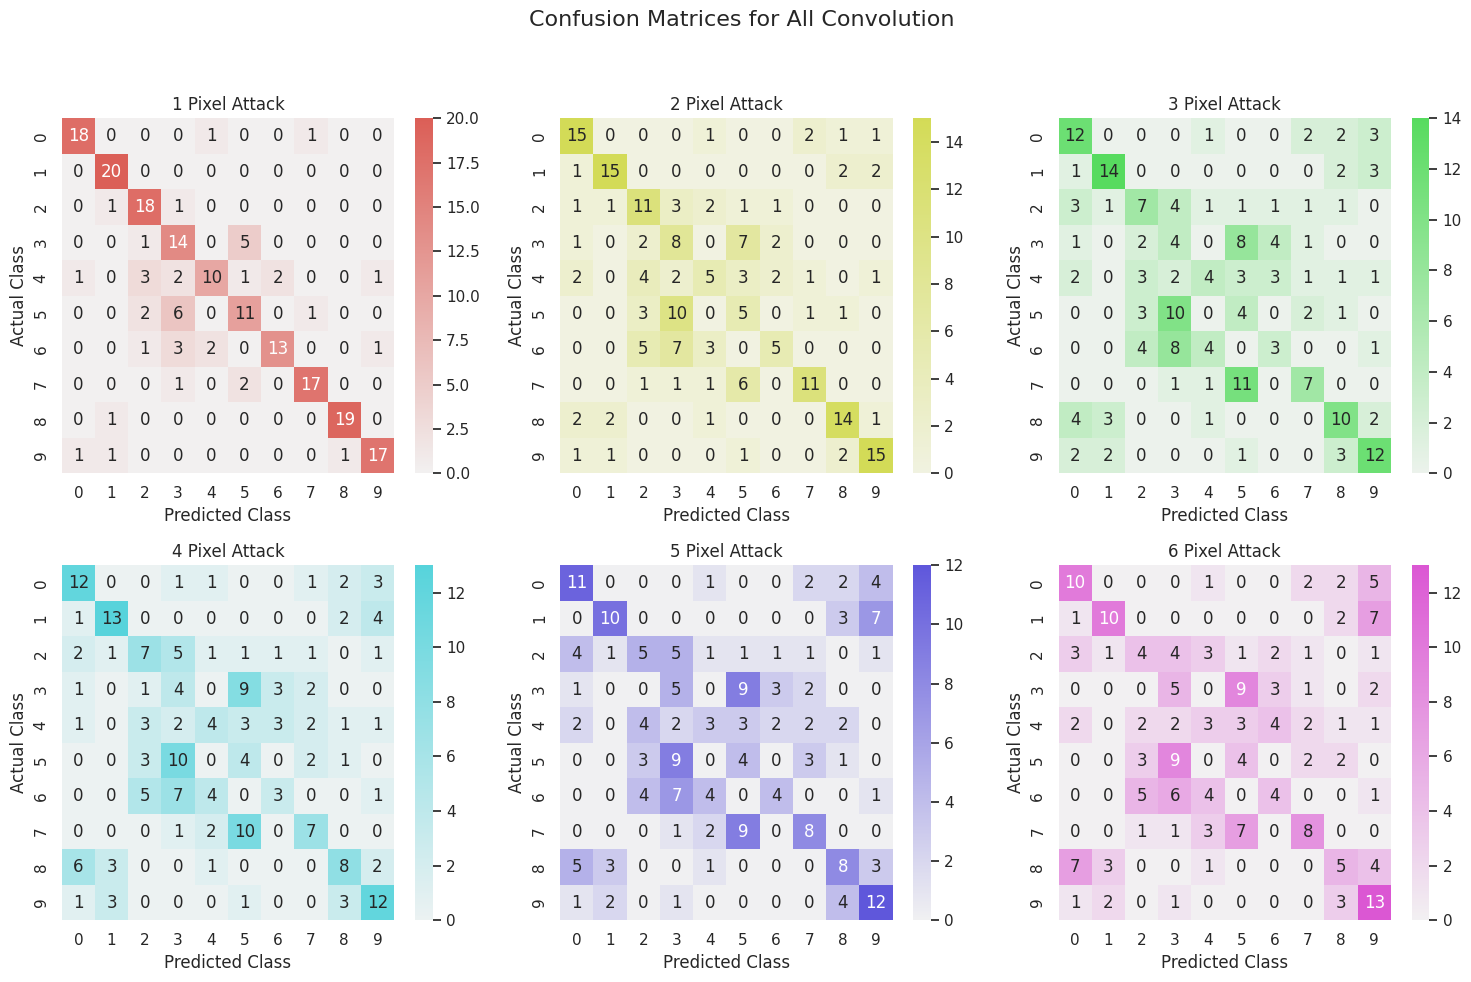

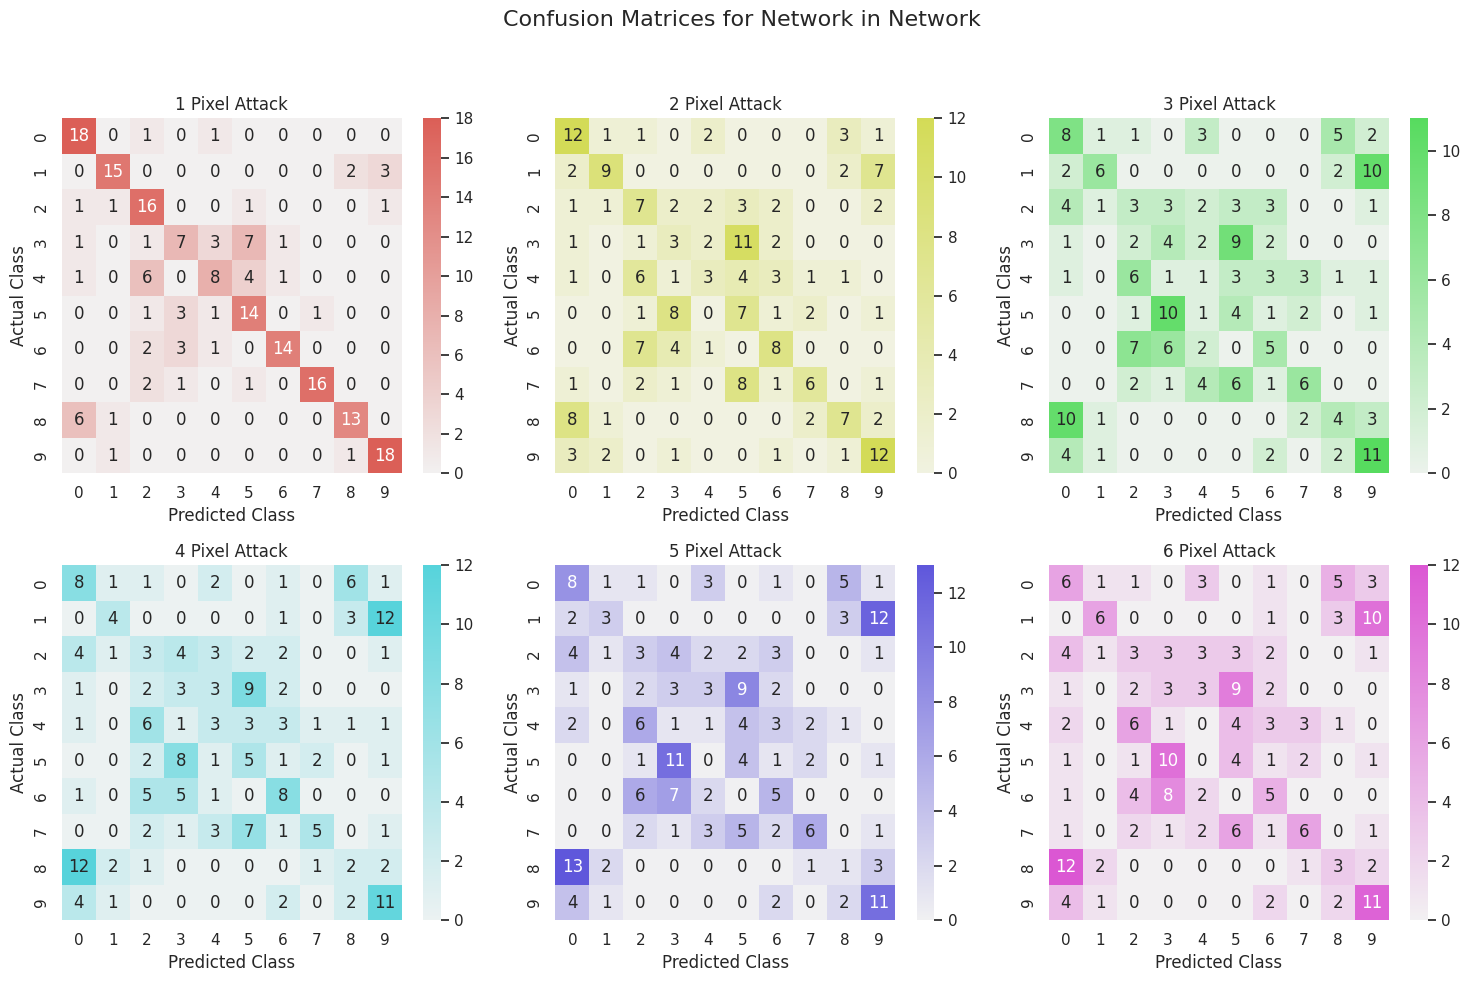

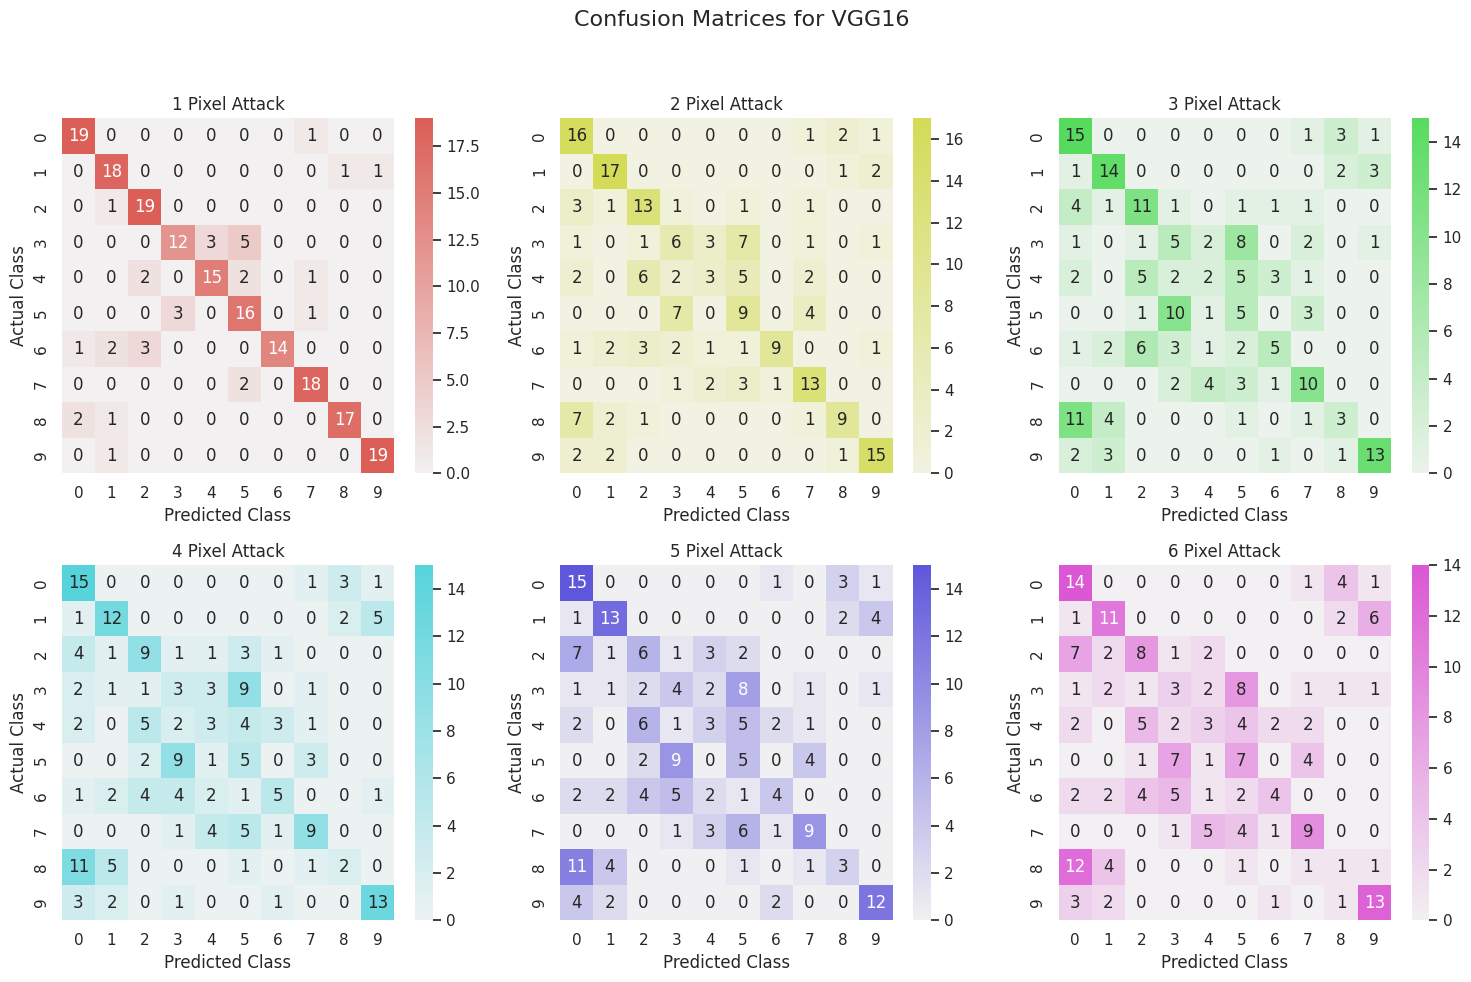

In [24]:
plot_confusion_matrices_by_model(model_tables, conf_matrix_set, pixel_counts=pixel_counts)

## Average Confidence / Adversarial Probability Labels

In [25]:
# Apply the conversion to the 'predicted_probs' column in the dataframe
df['predicted_probs'] = df['predicted_probs'].apply(convert_to_array)
df['pred_conf'] = df.apply(get_pred_conf, axis=1)
calculate_confidence_means(df)

pixel_count,1,2,3,4,5,6
model_name,,,,,,
All Convolution,62.7%,61.46%,63.69%,65.97%,66.86%,70.14%
Network in Network,55.86%,56.16%,58.97%,61.17%,61.64%,63.12%
VGG16,61.08%,59.32%,60.44%,62.83%,65.17%,66.83%


## Confidence Difference Boxplots



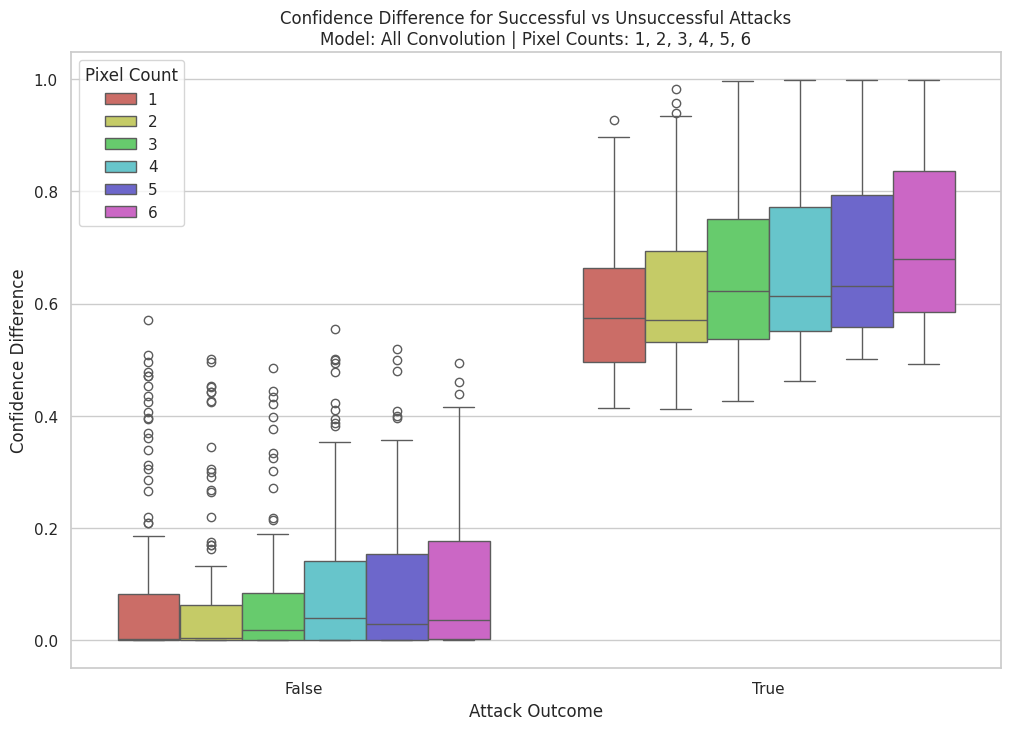

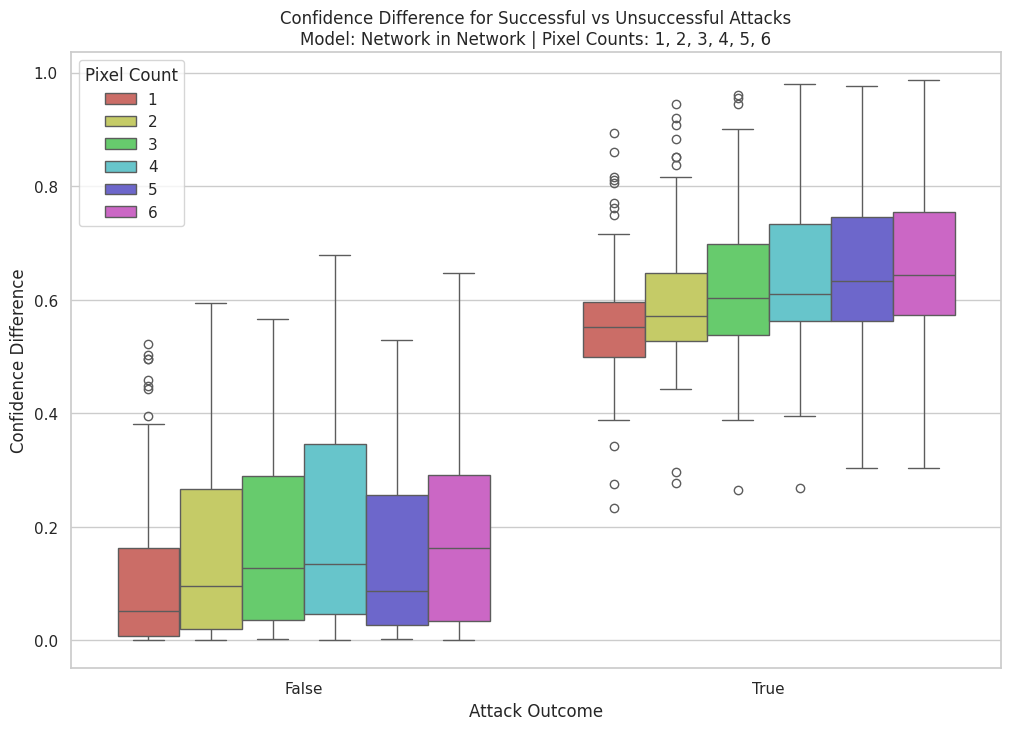

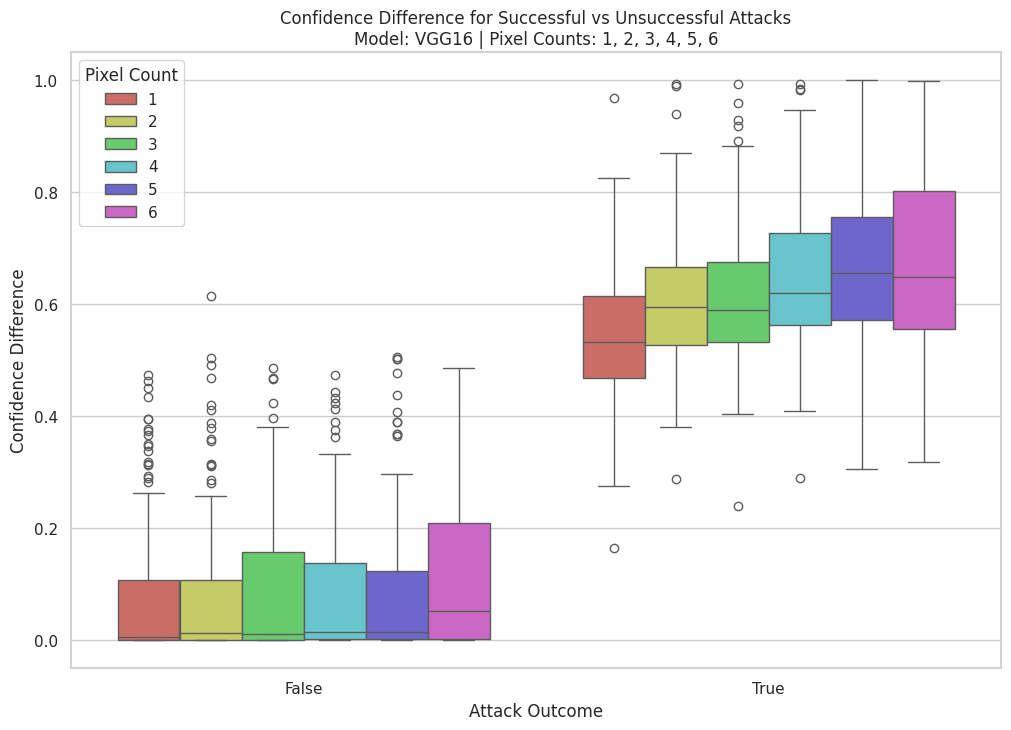

In [12]:
for model in model_names:
  plot_confidence_diff_by_outcome(df, model_names=[model], pixel_counts=pixel_counts)


## Identifyling Outliers

In [13]:
outliers_AllConv = identify_outliers(df, model_names=['All Convolution'], pixel_counts=pixel_counts)
outliers_Nin = identify_outliers(df, model_names=['Network in Network'], pixel_counts=pixel_counts)
outliers_VGG16 = identify_outliers(df, model_names=['VGG16'], pixel_counts=pixel_counts)
outliers_df = pd.concat([outliers_AllConv, outliers_Nin, outliers_VGG16], axis=0, ignore_index=True)

In [ ]:
#outliers_df.to_csv('outliers.csv', index=False)

<ipython-input-14-564f0deb90ea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)
<ipython-input-14-564f0deb90ea>:7: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)


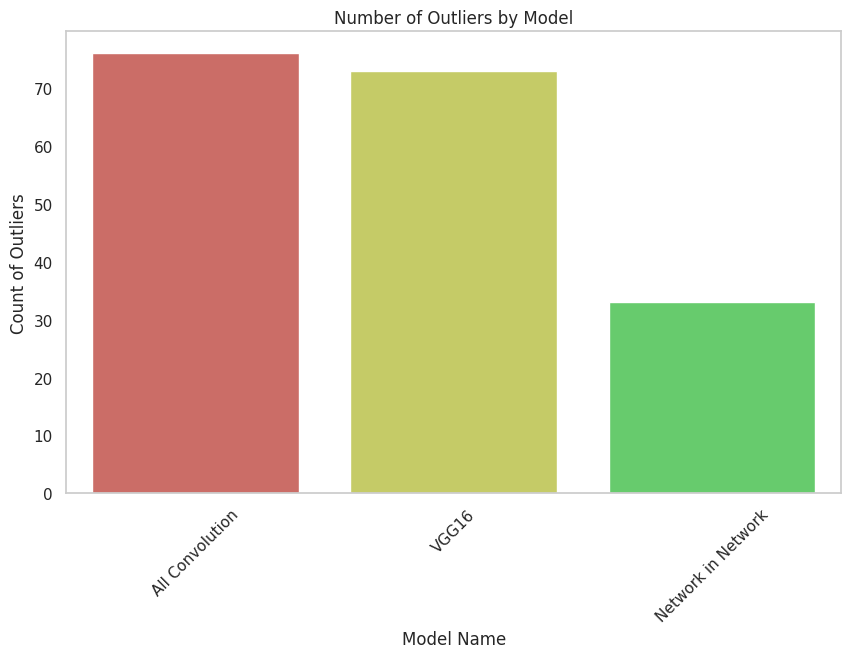

<ipython-input-14-564f0deb90ea>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_by_pixel.index, y=outliers_by_pixel.values, palette=palette)


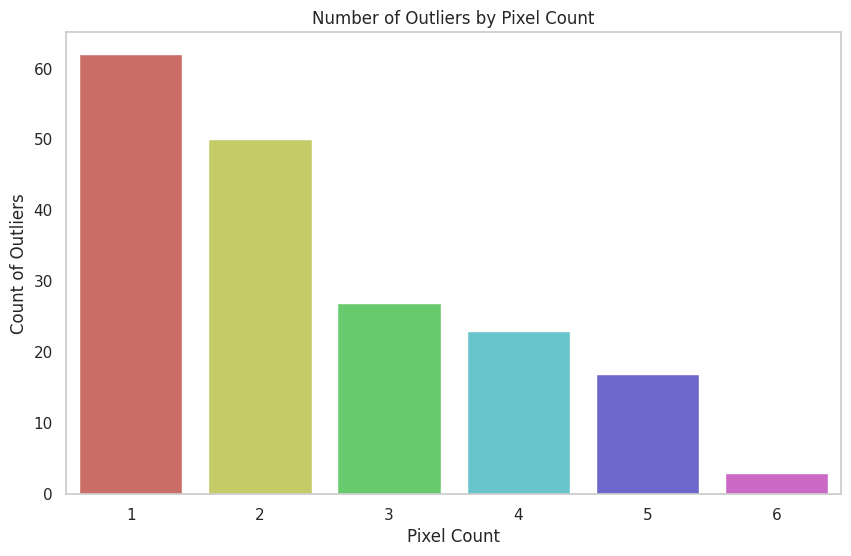

In [14]:
# Count of outliers by model
outliers_by_model = outliers_df['model_name'].value_counts()
#print(outliers_by_model)

# Bar plot for models
plt.figure(figsize=(10, 6))
sns.barplot(x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)
plt.title("Number of Outliers by Model")
plt.xlabel("Model Name")
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Count of outliers by pixel count
outliers_by_pixel = outliers_df['pixel_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=outliers_by_pixel.index, y=outliers_by_pixel.values, palette=palette)
plt.title("Number of Outliers by Pixel Count")
plt.xlabel("Pixel Count")
plt.ylabel("Count of Outliers")
plt.grid(False)
plt.show()


In [15]:
summary_table = outliers_df.groupby(['model_name', 'pixel_count', 'attack_outcome']).size().unstack(fill_value=0)
summary_table

attack_outcome                  False  True 
model_name         pixel_count              
All Convolution    1               22      1
                   2               19      3
                   3               12      0
                   4               10      0
                   5                6      0
                   6                3      0
Network in Network 1                8     11
                   2                0      9
                   3                0      4
                   4                0      1
VGG16              1               18      2
                   2               15      4
                   3                5      6
                   4                8      4
                   5               11      0

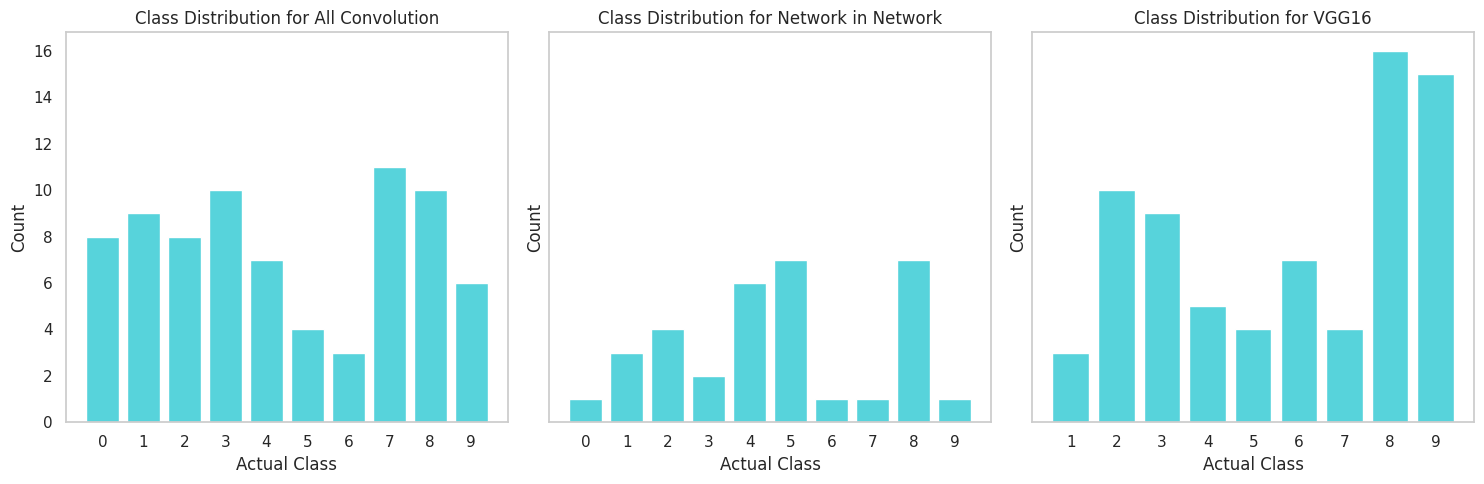

In [16]:
plot_class_distribution(outliers_df)

# Targeted attack

In [51]:
df2 = pd.read_csv('resultsCIFAR10target_.csv')


In [52]:
# Initialize dictionaries for results
model_tables_target = {}
conf_matrix_set_target = {}

# Loop through each model and pixel count, calculate success rates and confusion matrices
for model in model_names:
    model_results = {}

    for pixel in pixel_counts:
        filtered_df = df2[(df2['model_name'] == model) & (df2['pixel_count'] == pixel)]

        # Get success rate by class
        success_rate_class = success_by_class(filtered_df)

        # Get confusion matrix
        conf_matrix_data = conf_matrix(filtered_df, model, pixel)

        # Store results
        model_results[f"{pixel} Pixel"] = success_rate_class
        conf_matrix_set_target[f"{model} {pixel} Pixel"] = conf_matrix_data

    # Convert results into a DataFrame and store
    model_tables_target[model] = pd.DataFrame(model_results)

## Success Rate by Class Label & Pixel Count

In [53]:
model_tables_target["All Convolution"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,4.44%,11.11%,17.78%,16.67%,18.89%,18.89%
1,0.00%,12.22%,16.67%,20.00%,22.22%,21.11%
2,2.22%,20.00%,33.33%,38.89%,35.56%,42.22%
3,7.78%,18.89%,28.89%,35.56%,27.78%,27.78%
4,11.11%,37.78%,43.33%,40.00%,43.33%,38.89%
5,11.11%,27.78%,33.33%,35.56%,35.56%,32.22%
6,7.78%,20.00%,30.00%,31.11%,35.56%,28.89%
7,0.00%,3.33%,10.00%,14.44%,10.00%,14.44%
8,1.11%,5.56%,15.56%,22.22%,21.11%,18.89%


In [54]:
model_tables_target["Network in Network"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,1.11%,12.22%,20.00%,23.33%,25.56%,24.44%
1,5.56%,16.67%,30.00%,26.67%,33.33%,37.78%
2,4.44%,22.22%,28.89%,38.89%,43.33%,47.78%
3,13.33%,36.67%,48.89%,47.78%,43.33%,54.44%
4,22.22%,37.78%,43.33%,45.56%,44.44%,46.67%
5,7.78%,28.89%,33.33%,40.00%,37.78%,42.22%
6,13.33%,31.11%,38.89%,33.33%,36.67%,40.00%
7,2.22%,20.00%,34.44%,36.67%,38.89%,31.11%
8,15.56%,36.67%,42.22%,47.78%,47.78%,44.44%


In [55]:
model_tables_target["VGG16"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel,5 Pixel,6 Pixel
actual_class,,,,,,
0,2.22%,7.78%,12.22%,14.44%,15.56%,13.33%
1,12.22%,13.33%,25.56%,30.00%,24.44%,32.22%
2,1.11%,7.78%,25.56%,28.89%,30.00%,40.00%
3,18.89%,37.78%,41.11%,48.89%,48.89%,43.33%
4,4.44%,22.22%,36.67%,35.56%,35.56%,35.56%
5,10.00%,18.89%,33.33%,31.11%,35.56%,41.11%
6,8.89%,31.11%,42.22%,45.56%,43.33%,46.67%
7,1.11%,15.56%,25.56%,30.00%,26.67%,23.33%
8,3.33%,34.44%,42.22%,43.33%,48.89%,43.33%


/content/helper_functions.py:77: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  model_data = df.applymap(lambda x: float(x.strip('%')))


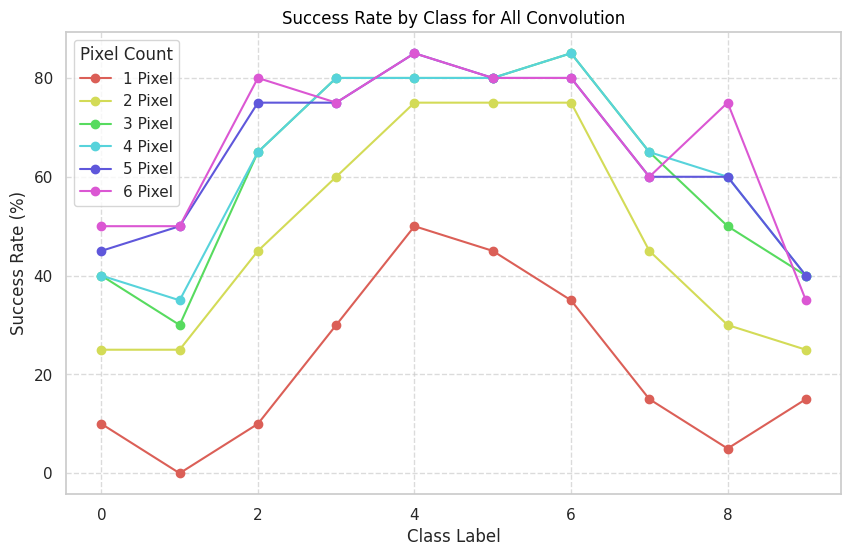

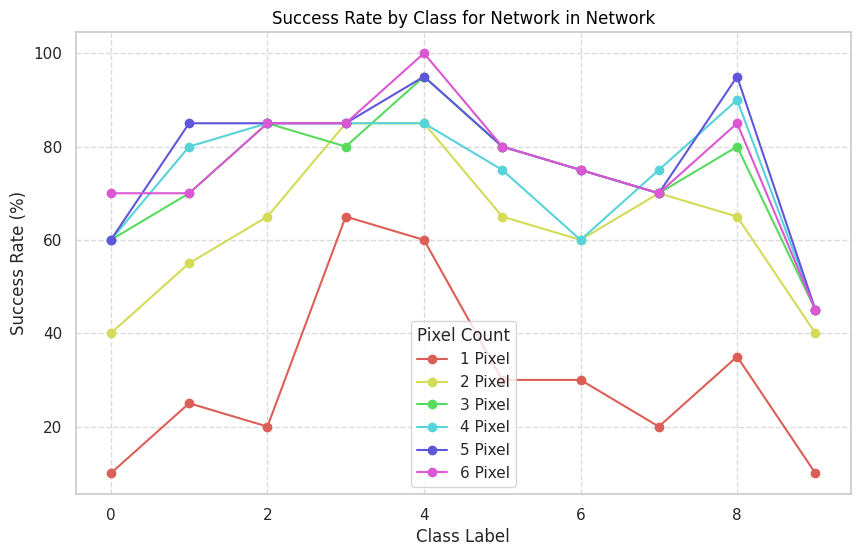

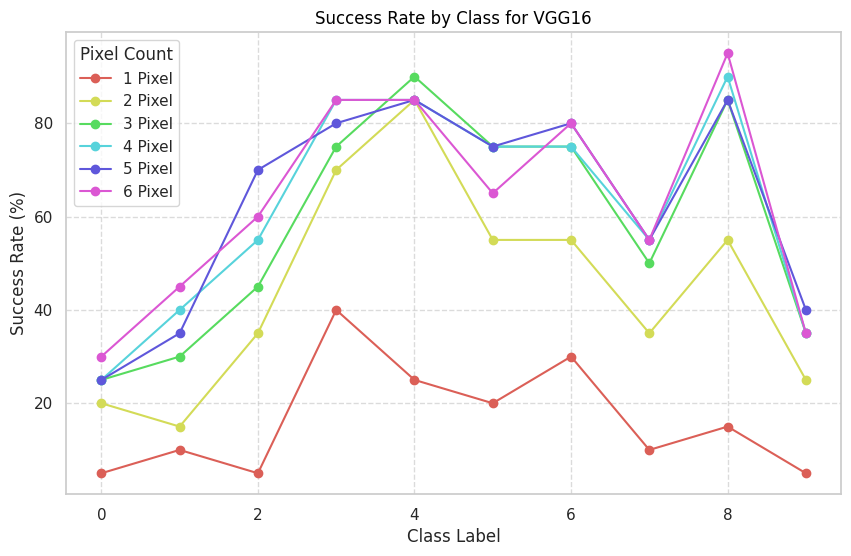

In [56]:
plot_success_rate_by_class(model_tables)

## Untargeted Success Rate by Pixel & model


In [57]:
get_success_rate_table_by_pixel_count(df2)

/content/helper_functions.py:129: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  success_by_pixel_count = success_by_pixel_count.applymap(lambda x: f"{x:.2f}%")


pixel_count,1,2,3,4,5,6
model_name,,,,,,
All Convolution,4.78%,16.78%,24.00%,26.67%,26.56%,25.56%
Network in Network,8.56%,25.33%,33.67%,35.33%,37.00%,38.22%
VGG16,6.56%,20.33%,30.67%,33.78%,33.00%,34.44%


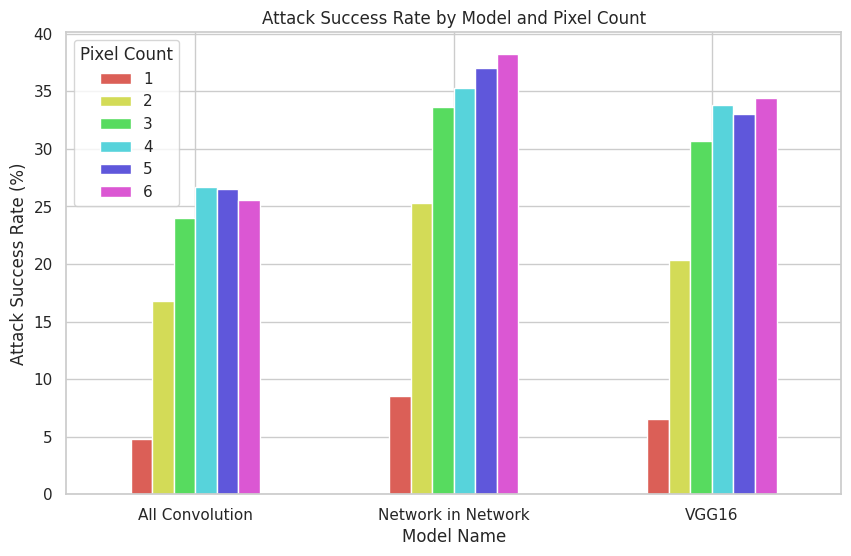

In [58]:
plot_success_rate_by_pixel_count(df2)

## Targeted Success Rate by Pixel & model

In [59]:
success_table = get_targeted_success_rate_table_by_pixel_count(df2)
success_table

/content/helper_functions.py:318: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  success_by_pixel_count = success_by_pixel_count.applymap(lambda x: f"{x:.2f}%")


pixel_count,1,2,3,4,5,6
model_name,,,,,,
All Convolution,3.00%,10.22%,18.11%,20.44%,20.33%,19.11%
Network in Network,4.89%,17.00%,25.22%,27.67%,28.22%,27.89%
VGG16,2.56%,9.33%,16.89%,20.44%,19.56%,21.22%


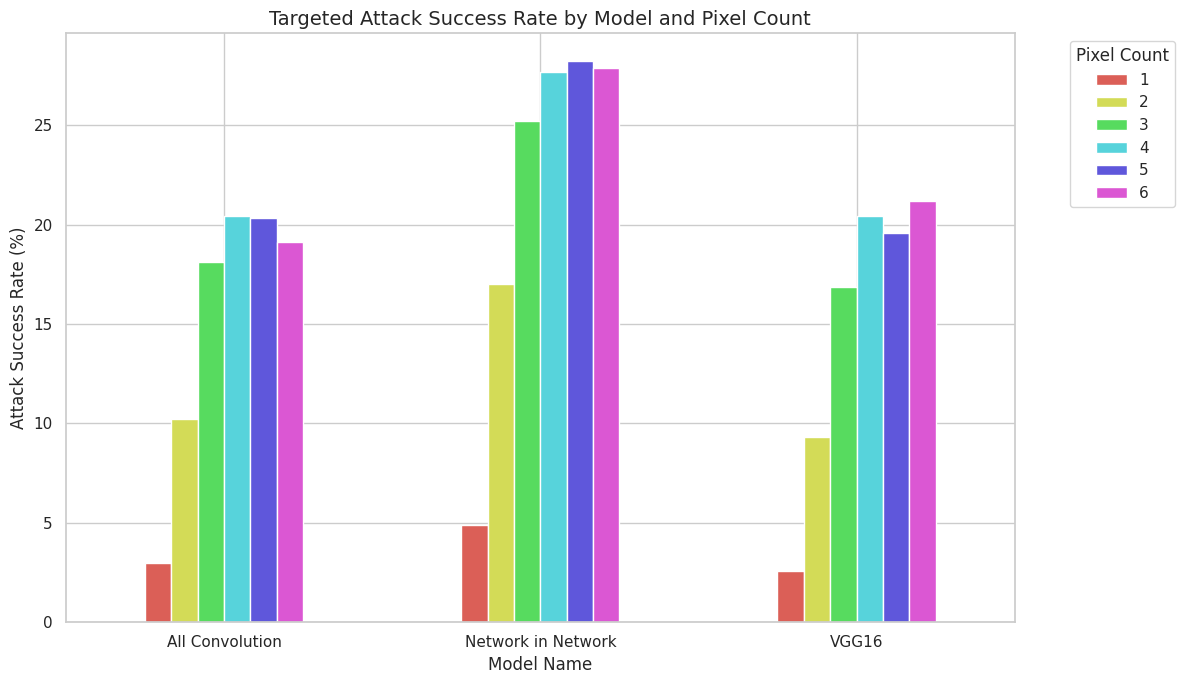

In [60]:
plot_targeted_success_rate_by_pixel_count(success_table)

## Confusion Matrices

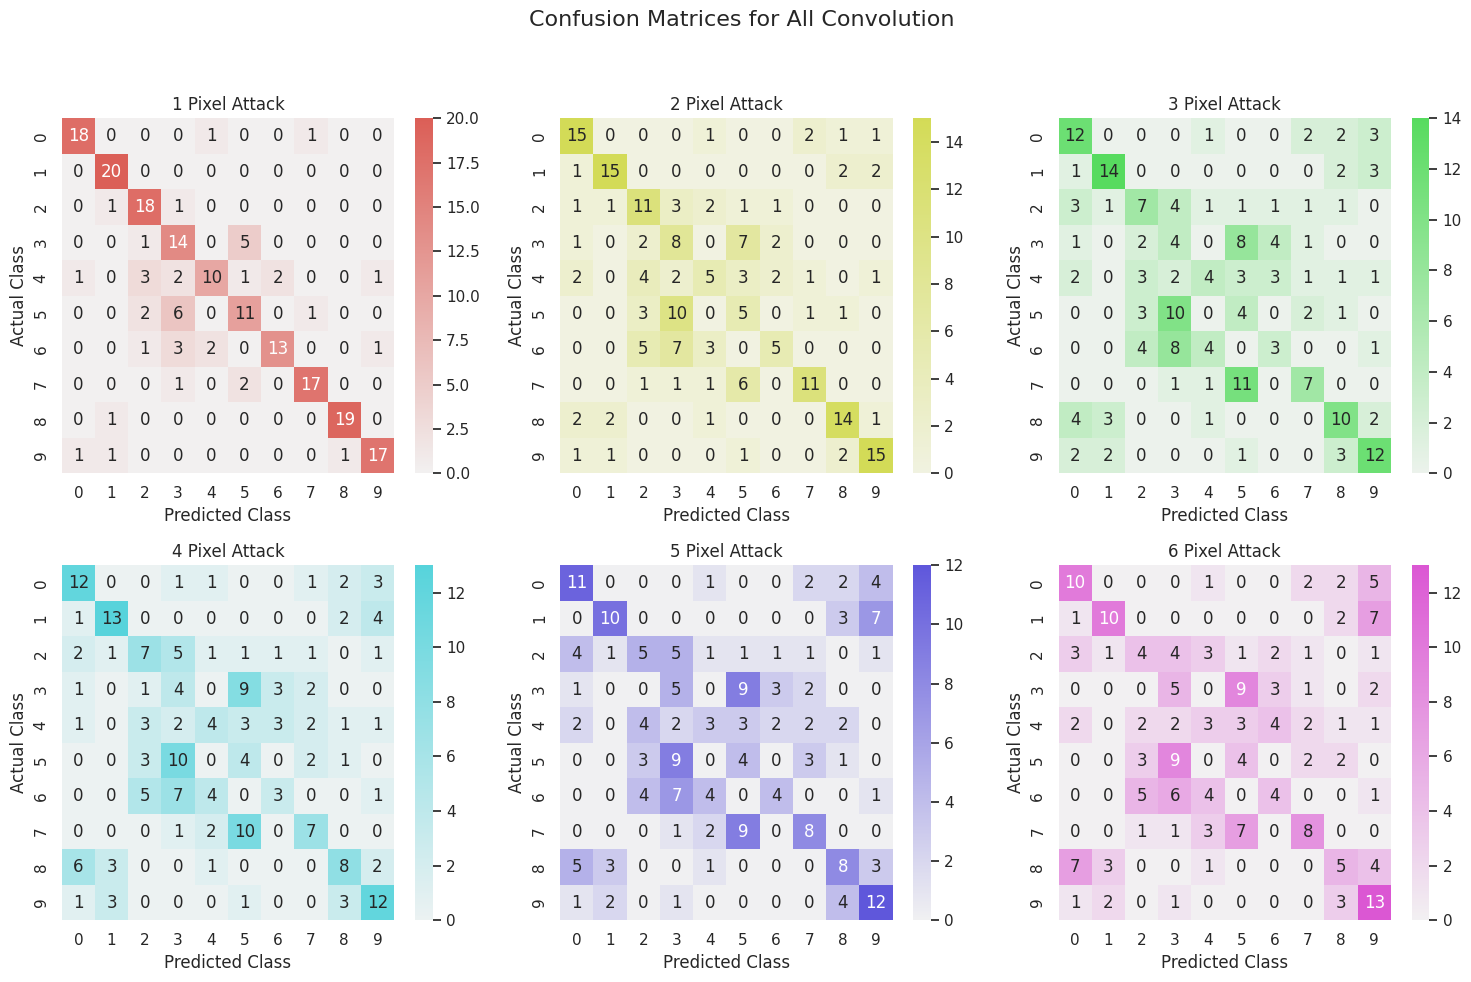

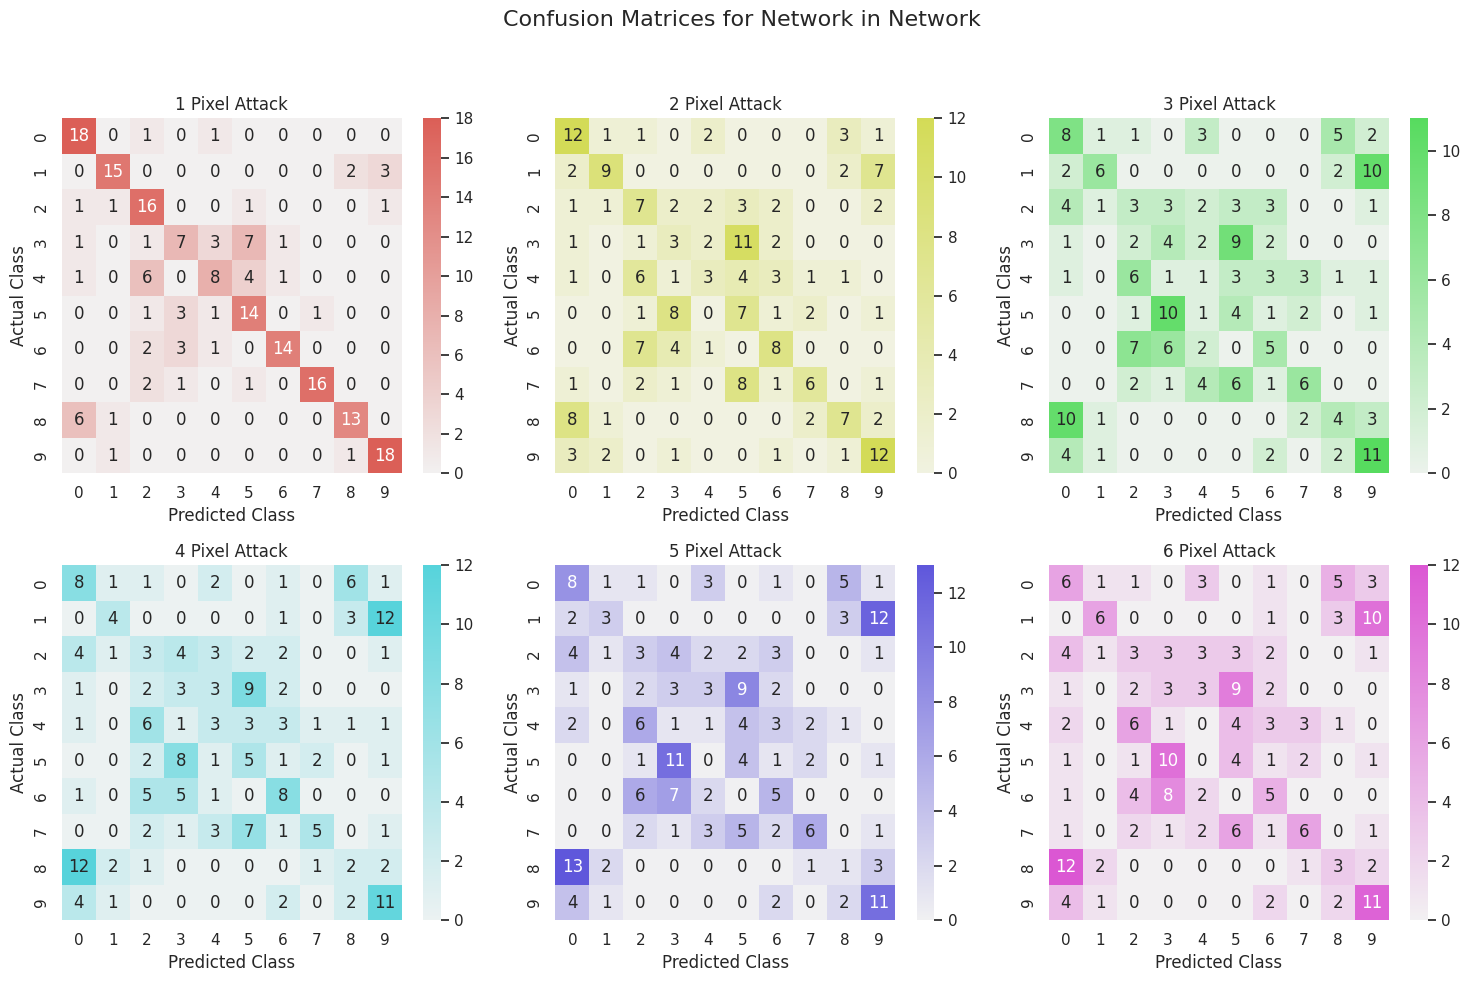

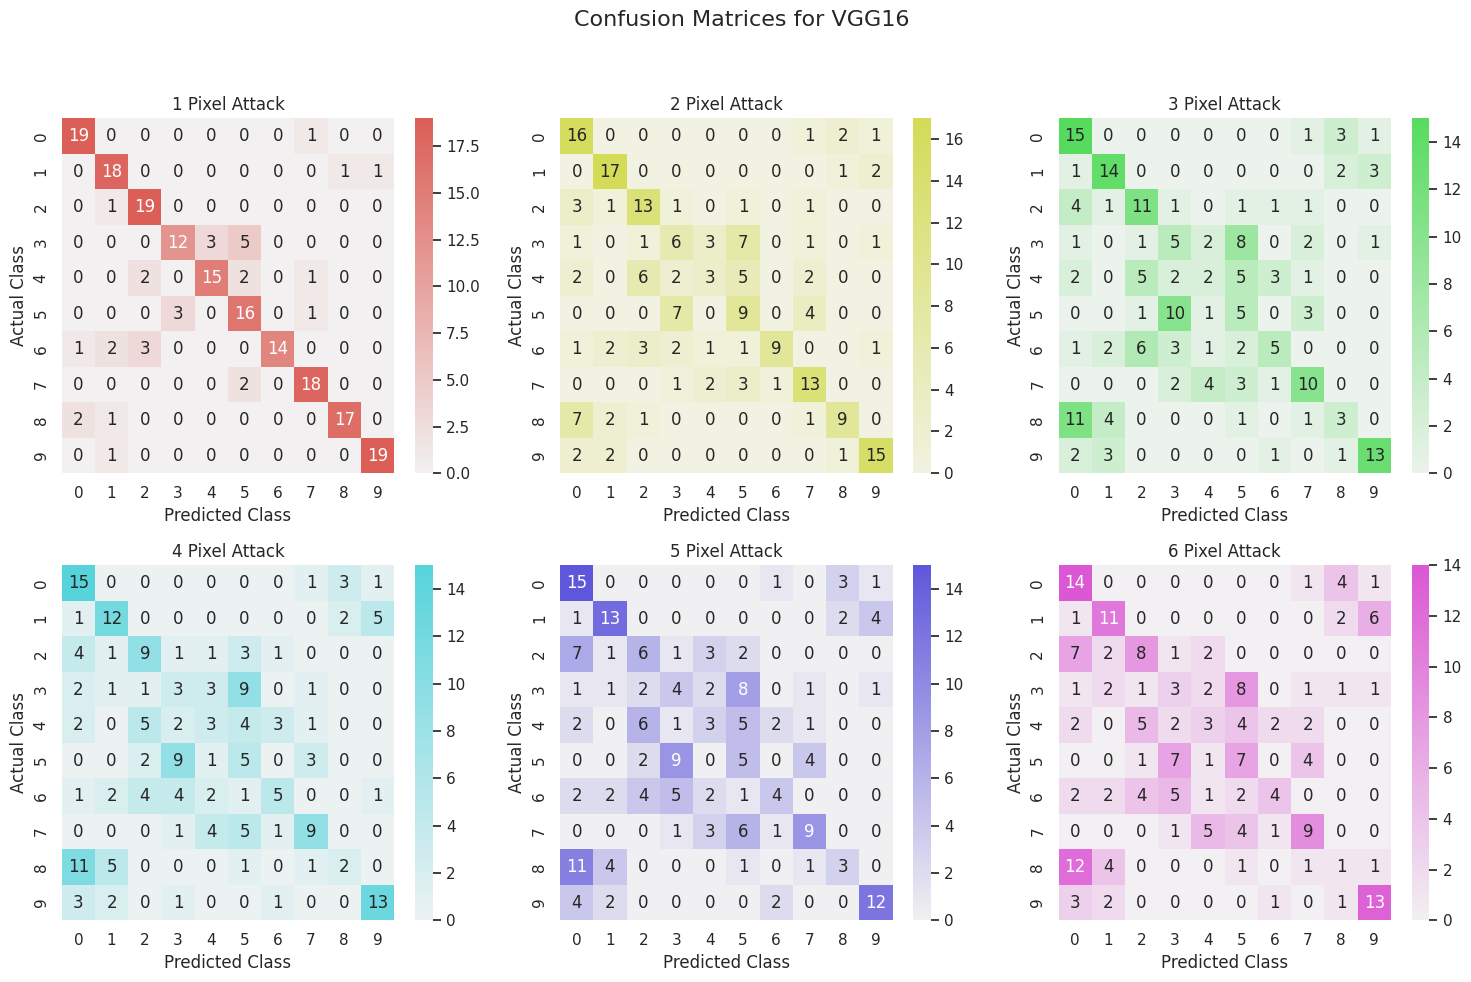

In [43]:
plot_confusion_matrices_by_model(model_tables, conf_matrix_set, pixel_counts=pixel_counts)

## Average Confidence / Adversarial Probability Labels

In [44]:
# Apply the conversion to the 'predicted_probs' column in the dataframe
df2['predicted_probs'] = df2['predicted_probs'].apply(convert_to_array)
df2['pred_conf'] = df2.apply(get_pred_conf, axis=1)

calculate_confidence_means(df2)

pixel_count,1,2,3,4,5,6
model_name,,,,,,
All Convolution,58.46%,54.19%,54.53%,54.39%,55.67%,59.82%
Network in Network,51.35%,47.4%,46.65%,47.47%,48.01%,48.77%
VGG16,58.26%,53.71%,53.02%,53.3%,55.91%,56.06%


## Confidence Difference Boxplots

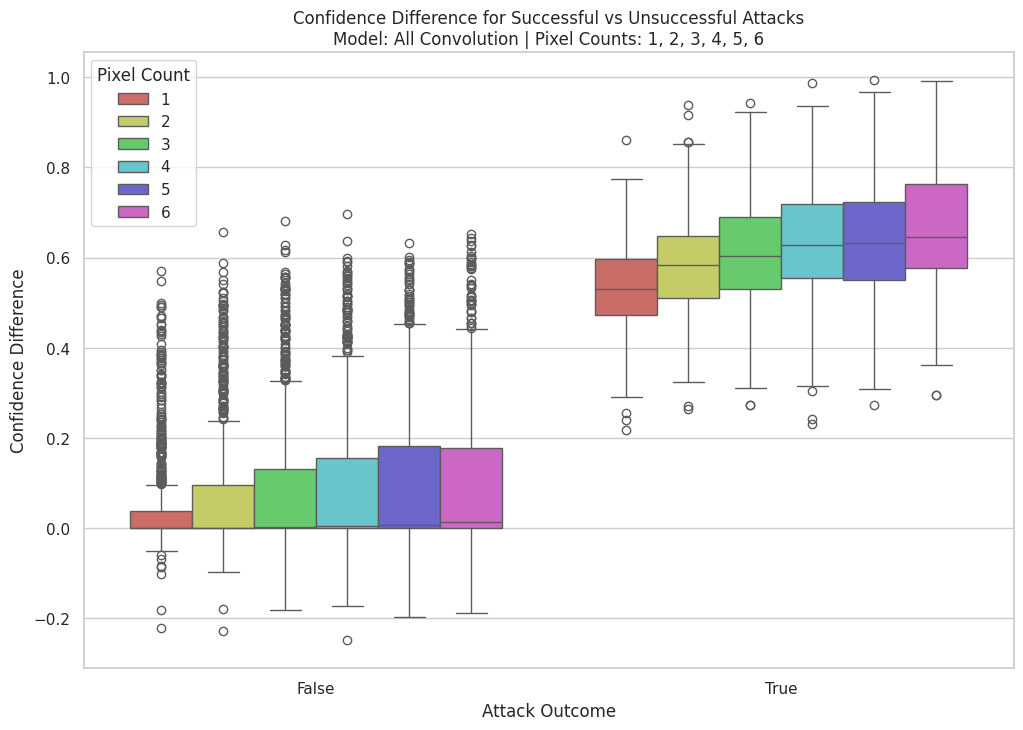

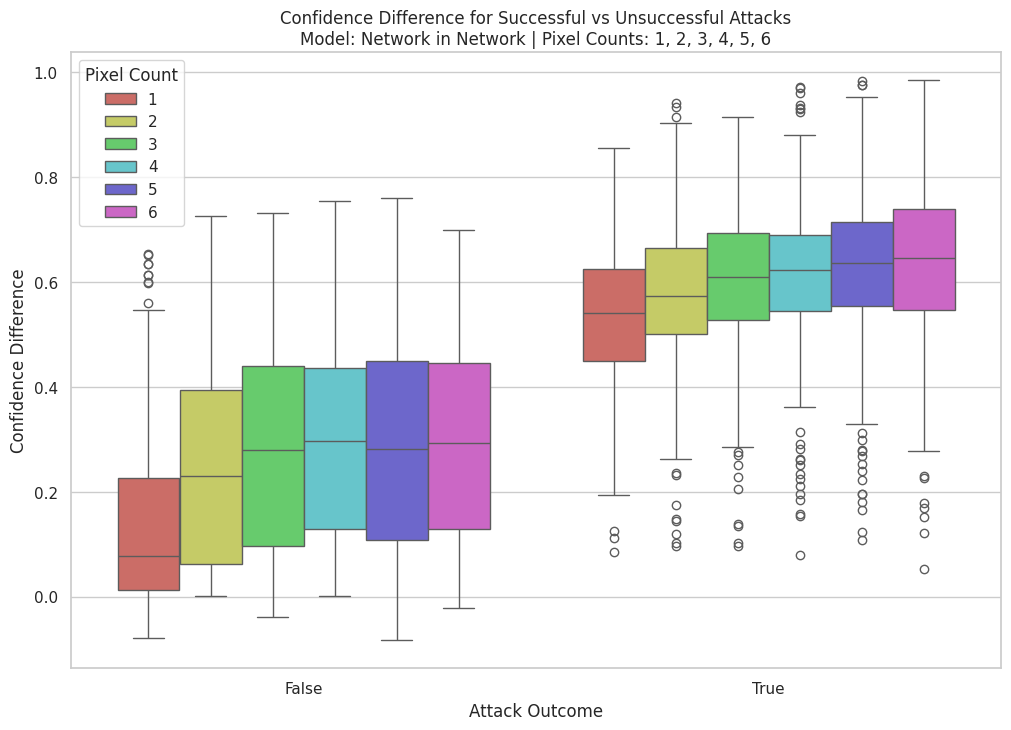

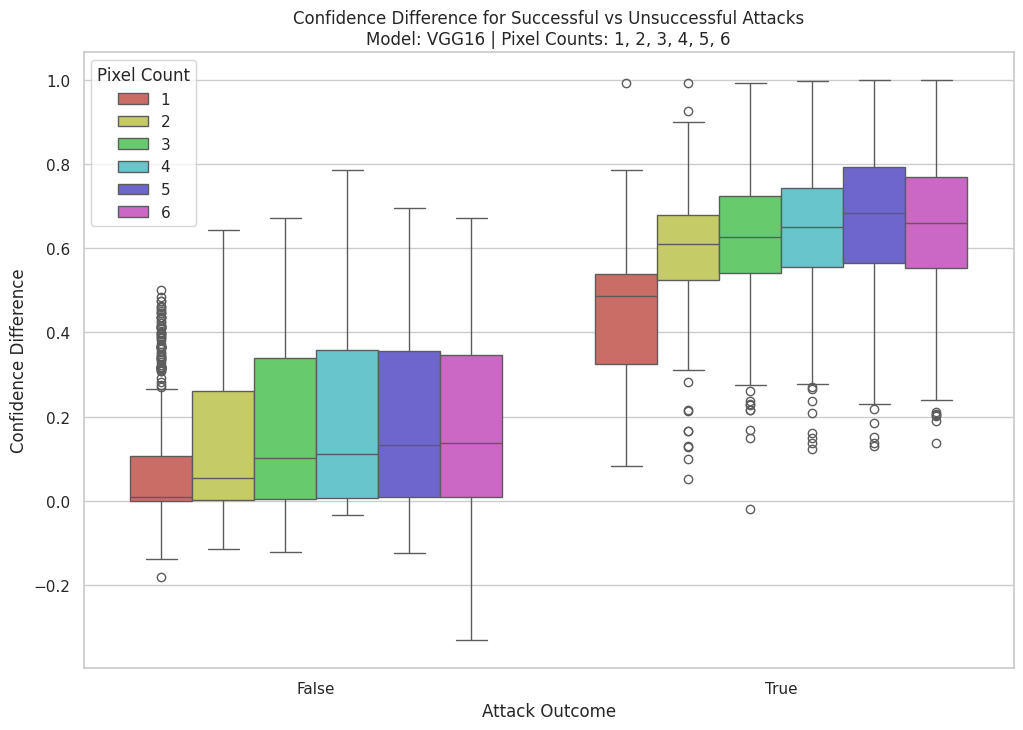

In [45]:
for model in model_names:
  plot_confidence_diff_by_outcome(df2, model_names=[model], pixel_counts=pixel_counts)

## Identifying Outliers

In [46]:
outliers_target_AllConv = identify_outliers(df2, model_names=['All Convolution'], pixel_counts=pixel_counts)
outliers_target_Nin = identify_outliers(df2, model_names=['Network in Network'], pixel_counts=pixel_counts)
outliers_target_VGG16 = identify_outliers(df2, model_names=['VGG16'], pixel_counts=pixel_counts)
outliers_target_df = pd.concat([outliers_target_AllConv, outliers_target_Nin, outliers_target_VGG16], axis=0, ignore_index=True)

<ipython-input-47-7ddf5bac8ac9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_target_by_model.index, y=outliers_target_by_model.values, palette=palette)
<ipython-input-47-7ddf5bac8ac9>:7: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=outliers_target_by_model.index, y=outliers_target_by_model.values, palette=palette)


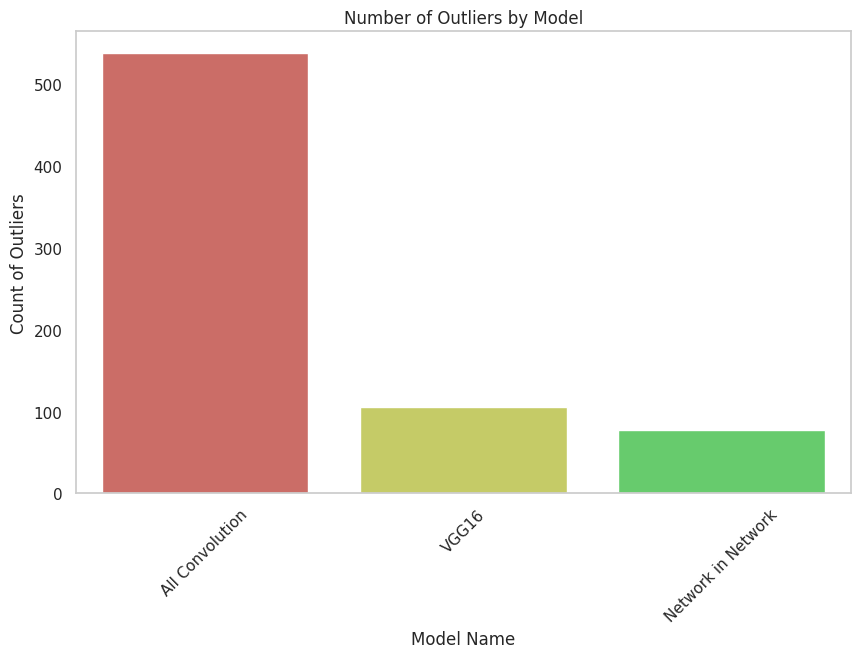

<ipython-input-47-7ddf5bac8ac9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_target_by_pixel.index, y=outliers_target_by_pixel.values, palette=palette)


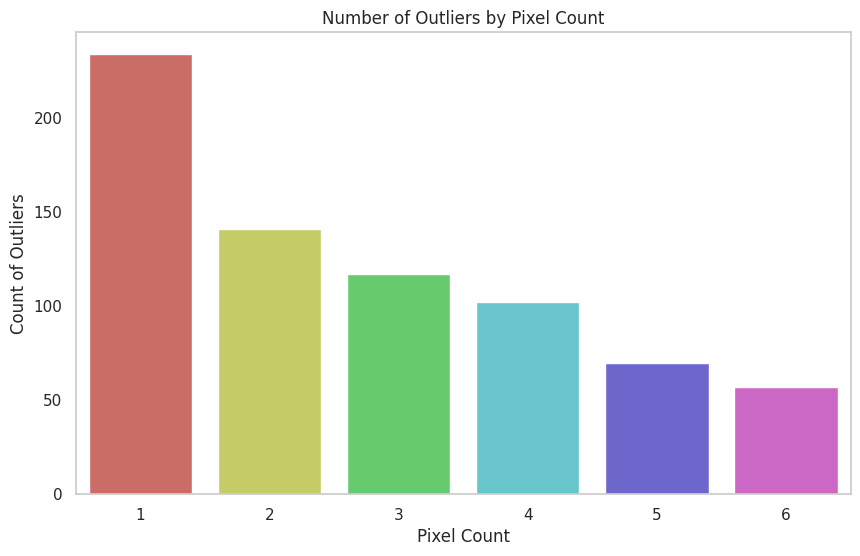

In [47]:
# Count of outliers by model
outliers_target_by_model = outliers_target_df['model_name'].value_counts()

# Bar plot for models
plt.figure(figsize=(10, 6))
sns.barplot(x=outliers_target_by_model.index, y=outliers_target_by_model.values, palette=palette)
plt.title("Number of Outliers by Model")
plt.xlabel("Model Name")
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Count of outliers by pixel count
outliers_target_by_pixel = outliers_target_df['pixel_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=outliers_target_by_pixel.index, y=outliers_target_by_pixel.values, palette=palette)
plt.title("Number of Outliers by Pixel Count")
plt.xlabel("Pixel Count")
plt.ylabel("Count of Outliers")
plt.grid(False)
plt.show()

In [48]:
summary_table2 = outliers_target_df.groupby(['model_name', 'pixel_count', 'attack_outcome']).size().unstack(fill_value=0)
summary_table2

attack_outcome                  False  True 
model_name         pixel_count              
All Convolution    1              151      4
                   2              113      6
                   3               96      3
                   4               69      4
                   5               46      2
                   6               42      2
Network in Network 1                9      3
                   2                0     11
                   3                0      9
                   4                0     21
                   5                0     17
                   6                0      7
VGG16              1               66      1
                   2                0     11
                   3                0      9
                   4                0      8
                   5                0      5
                   6                0      6

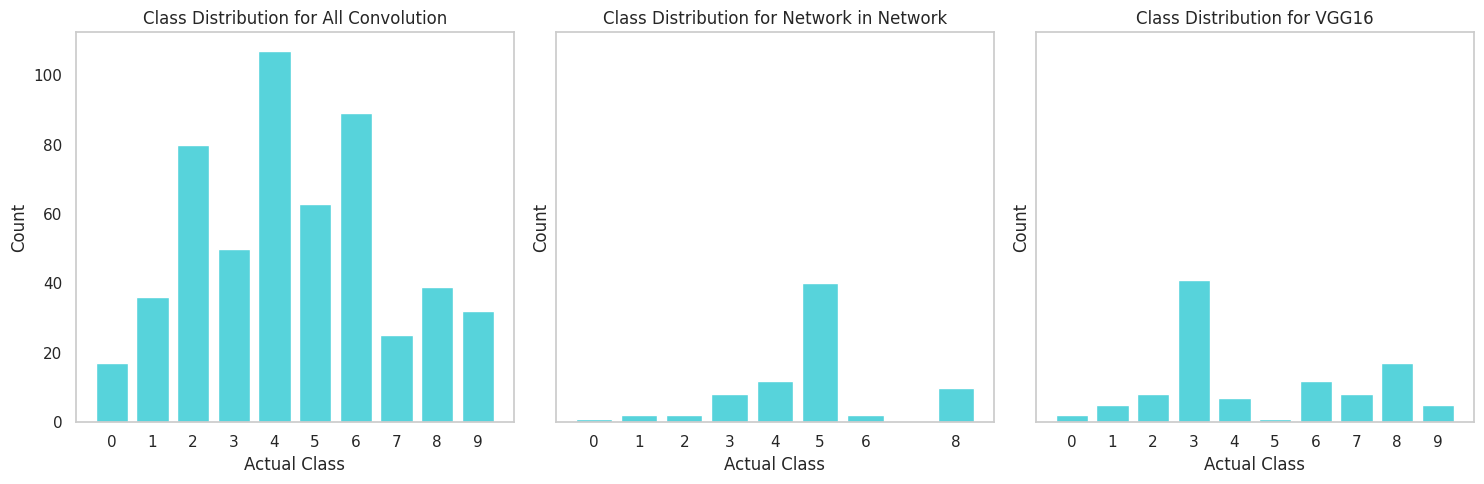

In [49]:
plot_class_distribution(outliers_target_df)